In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [3]:
# Load and Explore the Dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Preview
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
#  Split the Dataset
X = df[iris.feature_names]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [5]:
# Build and Train the Decision Tree Model
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

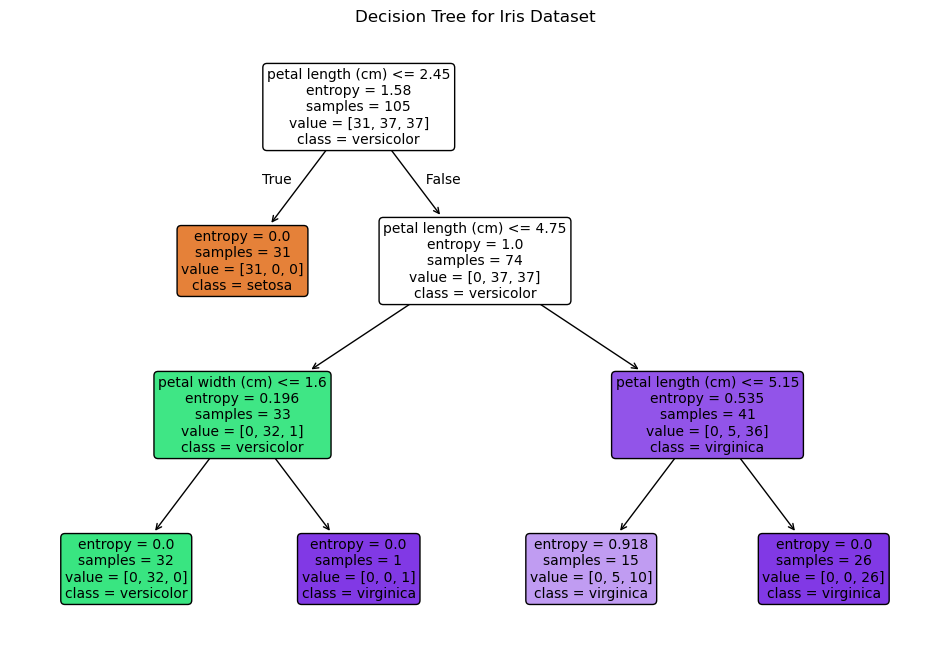

In [6]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model,
               feature_names=iris.feature_names,
               class_names=iris.target_names,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Decision Tree for Iris Dataset")
plt.show()


In [7]:
# Predictions and Evaluation
y_pred = dt_model.predict(X_test)

# Print metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy Score: 0.9777777777777777


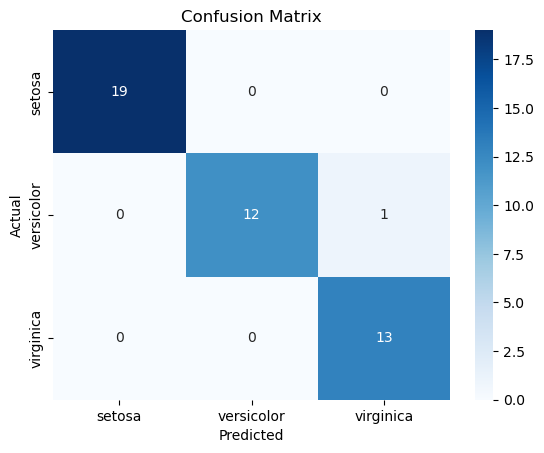

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
